# Assignment 3
# Submitted by Ursula Das (21032821) and Aman Kumar (20954277)

##Importing Libraries

In [ ]:
import tensorflow as tf
import os
import cv2 as cv
import imghdr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.utils import to_categorical
from keras.backend import binary_crossentropy
from google.colab import drive
from tensorflow.keras.utils import plot_model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Set Path for Saving

In [ ]:
path='/content/drive/My Drive/models_as3_dup/'

##Importing Datasets

In [ ]:
x_train=pd.read_csv('x_train.csv')
y_train=pd.read_csv('y_train.csv')
x_test=pd.read_csv('x_test.csv')
y_test=pd.read_csv('y_test.csv')

##Reshaping and Normalising the datasets

In [ ]:
def data_preprocessing(raw):
    num_images = raw.shape[0]
    x_as_array = raw.values[:,:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    image = x_shaped_array / 255
    return image
  
y_train_upd=tf.keras.utils.to_categorical(y_train, 5)
x_train_upd= data_preprocessing(x_train)
y_test_upd=tf.keras.utils.to_categorical(y_test, 5)
x_test_upd= data_preprocessing(x_test)

##List to store Runtime Information

In [ ]:
train_time=[]

In [ ]:
import random
random.seed(42)

# Question 1 - Default Architecture

##Setting Parameters

In [ ]:
#Setting Image Parameters
Img_shape = 28
Num_classes = 5
test_size = 0.2
random_state = 1234
No_epochs = 10
Batch_size = 32


##Train-Validation Split

In [ ]:
x_train_f, x_val_f, y_train_f, y_val_f = train_test_split(x_train_upd, y_train_upd,test_size=test_size, random_state=random_state)

##Define Model

In [ ]:

model = tf.keras.Sequential()



##Define Layers

In [ ]:
model.add(Conv2D(32,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(Flatten())
model.add(Dense(5,activation='softmax'))

##Compile Model

In [ ]:
model.compile(optimizer='sgd',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

##Fit Model

In [ ]:
start_time_def=time.time()
hist_def=model.fit(x_train_f, y_train_f,batch_size=Batch_size,epochs=No_epochs,verbose=1,validation_data=(x_val_f, y_val_f))
end_time_def=time.time()
with open(path+'/train_info.doc', 'w') as f:
    f.write('Default Model : '+str(end_time_def-start_time_def))
train_time.append(end_time_def-start_time_def)


Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.6087 - accuracy: 0.7593 - val_loss: 0.4518 - val_accuracy: 0.8332
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4189 - accuracy: 0.8465 - val_loss: 0.3941 - val_accuracy: 0.8560
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3697 - accuracy: 0.8673 - val_loss: 0.3763 - val_accuracy: 0.8636
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3391 - accuracy: 0.8788 - val_loss: 0.3550 - val_accuracy: 0.8692
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3178 - accuracy: 0.8877 - val_loss: 0.3299 - val_accuracy: 0.8789
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3013 - accuracy: 0.8931 - val_loss: 0.3041 - val_accuracy: 0.8917
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2886 - accuracy: 0.8987 - val_loss: 0.2971 - val_accuracy:

##Model Summary

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (32, 28, 28, 32)          320       
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 14, 14, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (32, 14, 14, 32)          9248      
                                                                 
 flatten_1 (Flatten)         (32, 6272)                0         
                                                                 
 dense_1 (Dense)             (32, 5)                   31365     
                                                                 
Total params: 40,933
Trainable params: 40,933
Non-trainable params: 0
__________________________________________________

## Save Model

In [ ]:
path_def=path+'default/'
if not os.path.exists(path_def):
    os.makedirs(path_def)
model.save(path_def)

##Evaluate model on Test Dataset

In [ ]:
score = model.evaluate(x_test_upd, y_test_upd,batch_size=Batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
with open(path+'/train_info.doc', 'a') as f:
    f.write('\n'+'Default Model Test Accuracy : '+str(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.2781 - accuracy: 0.8979
Test loss: 0.27806368470191956
Test accuracy: 0.8978999853134155


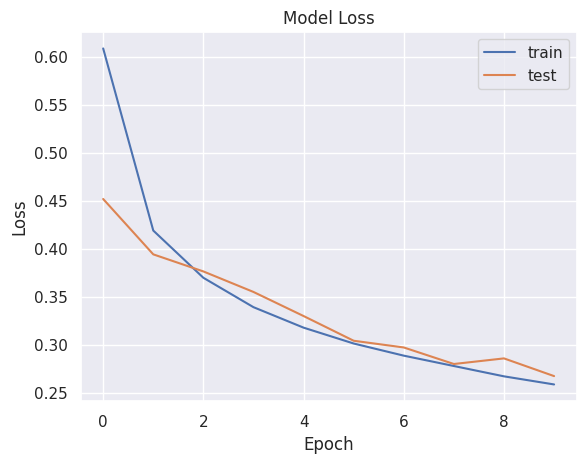

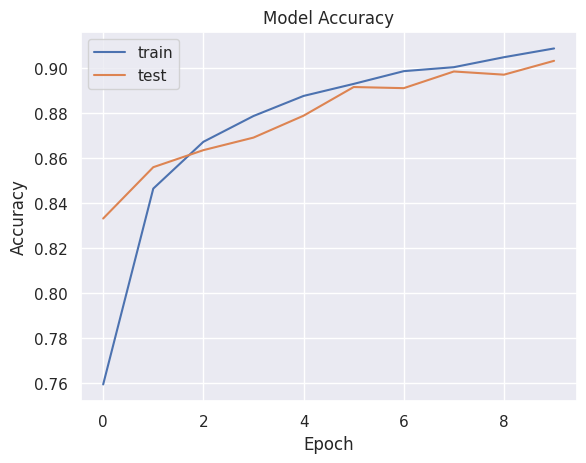

In [ ]:
# Plot the training and validation loss
sns.set(style='darkgrid')
sns.lineplot(data=hist_def.history['loss'], label='train')
sns.lineplot(data=hist_def.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig(path_def+'/def_loss.png')
plt.show()

# Plot the training and validation accuracy
sns.set(style='darkgrid')
sns.lineplot(data=hist_def.history['accuracy'], label='train')
sns.lineplot(data=hist_def.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(path_def+'/def_acc.png')
plt.show()


##Plot Model Layers

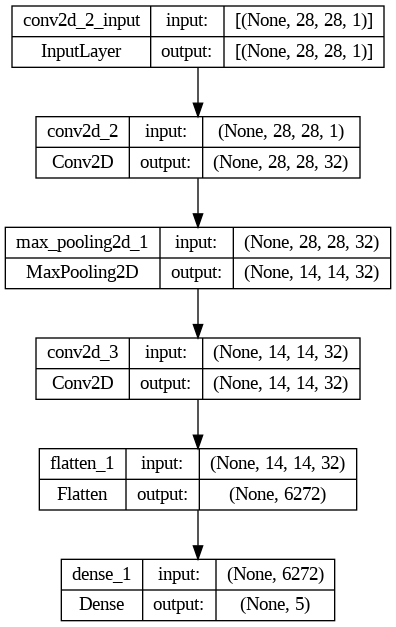

In [ ]:
plot_model(model, to_file=path_def+'model_def.png', show_shapes=True, show_layer_names=True)


# Question 2

#Architecture 1

##Hyperparameters

Epoch increased to 36

In [ ]:
#Setting Image Parameters
Img_shape = 28
Num_classes = 5
test_size = 0.2
random_state = 1234
No_epochs = 36
Batch_size = 32


##Train-Validation Split

In [ ]:
x_train_f, x_val_f, y_train_f, y_val_f = train_test_split(x_train_upd, y_train_upd,test_size=test_size, random_state=random_state)

## Model Architecture

Added 1 convolution layer and 1 Maxpooling layer and 1 more Dense Layer

In [ ]:
model_1 = tf.keras.Sequential()



In [ ]:
model_1.add(Conv2D(32,(3,3),strides=(1,1),padding='same',activation='relu'))
model_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(32,(3,3),strides=(1,1),padding='same',activation='relu'))
model_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(32,(3,3),strides=(1,1),padding='same',activation='relu'))
model_1.add(Flatten())
model_1.add(Dense(5,activation='relu'))
model_1.add(Dense(5,activation='softmax'))

In [ ]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
path_m1=path+'m1/'
if not os.path.exists(path_m1):
    os.makedirs(path_m1)

###Save runtime

In [ ]:
start_time_1=time.time()
hist_1=model_1.fit(x_train_f, y_train_f,batch_size=Batch_size,epochs=No_epochs,verbose=1,validation_data=(x_val_f, y_val_f))
end_time_1=time.time()
with open(path+'/train_info.doc', 'a') as f:
    f.write('/n'+'Model 1 : '+str(end_time_1-start_time_1))
train_time.append(end_time_1-start_time_1)

Epoch 1/36
1500/1500 [==============================] - 9s 5ms/step - loss: 0.4831 - accuracy: 0.8233 - val_loss: 0.3279 - val_accuracy: 0.8895
Epoch 2/36
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2742 - accuracy: 0.9046 - val_loss: 0.2505 - val_accuracy: 0.9107
Epoch 3/36
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2213 - accuracy: 0.9210 - val_loss: 0.2684 - val_accuracy: 0.9001
Epoch 4/36
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1965 - accuracy: 0.9304 - val_loss: 0.1998 - val_accuracy: 0.9308
Epoch 5/36
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1742 - accuracy: 0.9382 - val_loss: 0.1919 - val_accuracy: 0.9330
Epoch 6/36
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1590 - accuracy: 0.9427 - val_loss: 0.1756 - val_accuracy: 0.9373
Epoch 7/36
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1467 - accuracy: 0.9471 - val_loss: 0.1920 - val_accuracy

### Save Model

In [ ]:
model_1.save(path_m1)

### Evaluate on Test Dataset

In [ ]:
score_1 = model_1.evaluate(x_test_upd, y_test_upd,batch_size=Batch_size)
print('Test loss:', score_1[0])
print('Test accuracy:', score_1[1])
with open(path_m1+'/train_info.docx', 'a') as f:
    # Write the value to the file
    f.write('\n'+' Model 1 Test Accuracy : '+str(score_1[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.4346 - accuracy: 0.9270
Test loss: 0.4345631003379822
Test accuracy: 0.9269999861717224


In [ ]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 flatten_2 (Flatten)         (None, 1568)             

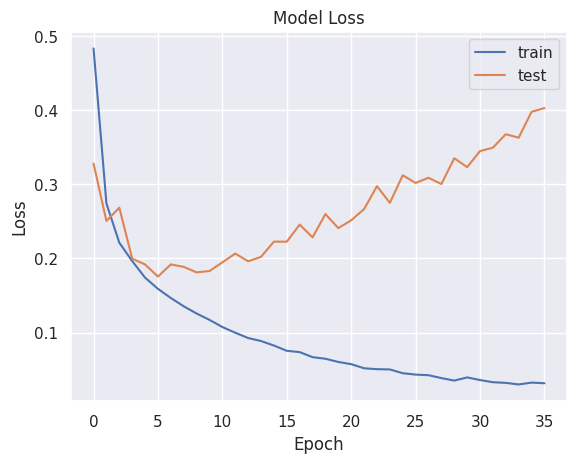

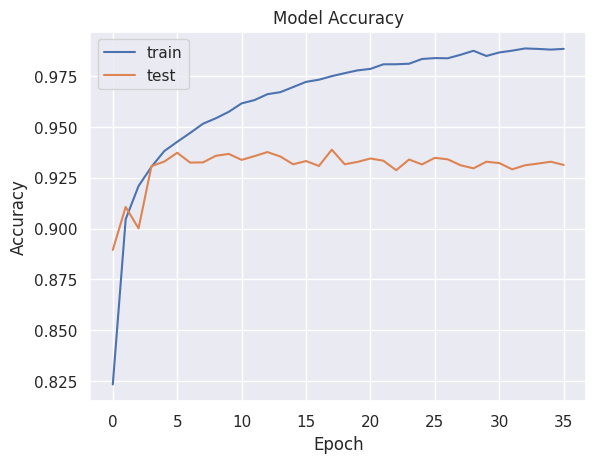

In [ ]:
# Plot the training and validation loss
sns.set(style='darkgrid')
sns.lineplot(data=hist_1.history['loss'], label='train')
sns.lineplot(data=hist_1.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig(path_m1+'/m1_loss.png')
plt.show()

# Plot the training and validation accuracy
sns.set(style='darkgrid')
sns.lineplot(data=hist_1.history['accuracy'], label='train')
sns.lineplot(data=hist_1.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(path_m1+'/m1_acc.png')
plt.show()


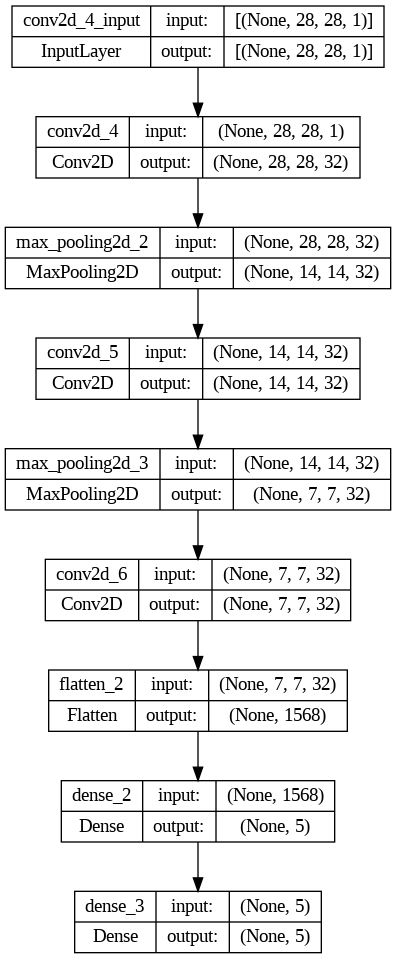

In [ ]:
plot_model(model_1, to_file=path_m1+'/model_1.png', show_shapes=True, show_layer_names=True)

# Architecture 2

## Hyperparameters
Early Stopping : Reduced epochs to prevent overfitting as observed in the loss plot

In [ ]:
#Setting Image Parameters
Img_shape = 28
Num_classes = 5
test_size = 0.2
random_state = 1234
No_epochs = 6
Batch_size = 32

## Validation Split

In [ ]:
x_train_f, x_val_f, y_train_f, y_val_f = train_test_split(x_train_upd, y_train_upd,test_size=test_size, random_state=random_state)

## Model Architecture
Increased the number of filters in convolutional layers , penultimate dense layer with increased units (64)


In [ ]:
model_2= tf.keras.Sequential()

In [ ]:
model_2.add(Conv2D(32,(3,3),strides=(1,1),padding='same',activation='relu'))
model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu'))
model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu'))
model_2.add(Flatten())

model_2.add(Dense(64,activation='relu'))
model_2.add(Dense(5,activation='softmax'))

In [ ]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
path_m2=path+'m2/'
if not os.path.exists(path_m2):
    os.makedirs(path_m2)

In [ ]:
start_time_2=time.time()
hist_2=model_2.fit(x_train_f, y_train_f,batch_size=Batch_size,epochs=No_epochs,verbose=1,validation_data=(x_val_f, y_val_f))
end_time_2=time.time()
with open(path_m2+'train_info.docx', 'a') as f:
    
    f.write('\n'+'Model 2 : '+str(end_time_2-start_time_2))
train_time.append(end_time_2-start_time_2)

Epoch 1/6
1500/1500 [==============================] - 10s 5ms/step - loss: 0.3339 - accuracy: 0.8749 - val_loss: 0.2527 - val_accuracy: 0.9109
Epoch 2/6
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2001 - accuracy: 0.9283 - val_loss: 0.1883 - val_accuracy: 0.9299
Epoch 3/6
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1633 - accuracy: 0.9417 - val_loss: 0.1722 - val_accuracy: 0.9402
Epoch 4/6
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1368 - accuracy: 0.9494 - val_loss: 0.1799 - val_accuracy: 0.9319
Epoch 5/6
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1160 - accuracy: 0.9573 - val_loss: 0.1743 - val_accuracy: 0.9399
Epoch 6/6
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0984 - accuracy: 0.9639 - val_loss: 0.1621 - val_accuracy: 0.9443


In [ ]:
model_2.save(path_m2)

In [ ]:
score_2 = model_2.evaluate(x_test_upd, y_test_upd,batch_size=Batch_size)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])
with open(path_m2+'train_info.docx', 'a') as f:
    
    f.write('\n'+' Model 2 Test Accuracy : '+str(score_2[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.1807 - accuracy: 0.9416
Test loss: 0.180718332529068
Test accuracy: 0.9416000247001648


In [ ]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 flatten_3 (Flatten)         (None, 6272)             

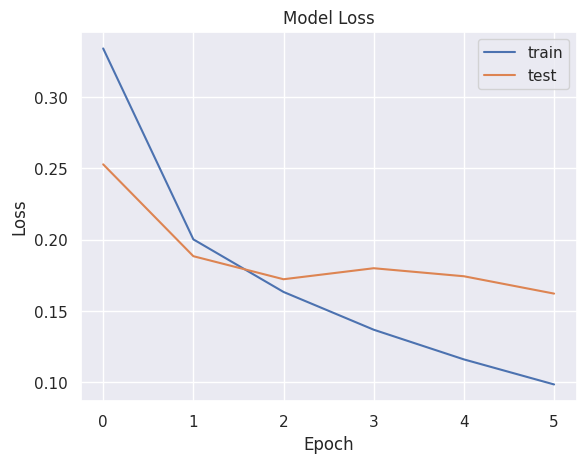

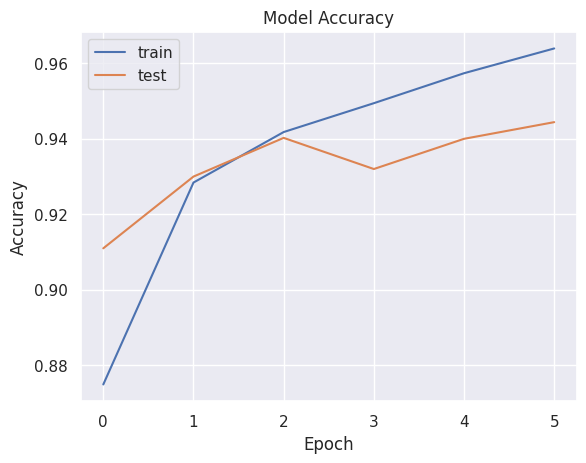

In [ ]:
# Plot the training and validation loss
sns.set(style='darkgrid')
sns.lineplot(data=hist_2.history['loss'], label='train')
sns.lineplot(data=hist_2.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig(path_m2+'/m2_loss.png')
plt.show()


# Plot the training and validation accuracy
sns.set(style='darkgrid')
sns.lineplot(data=hist_2.history['accuracy'], label='train')
sns.lineplot(data=hist_2.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(path_m2+'/m2_acc.png')
plt.show()


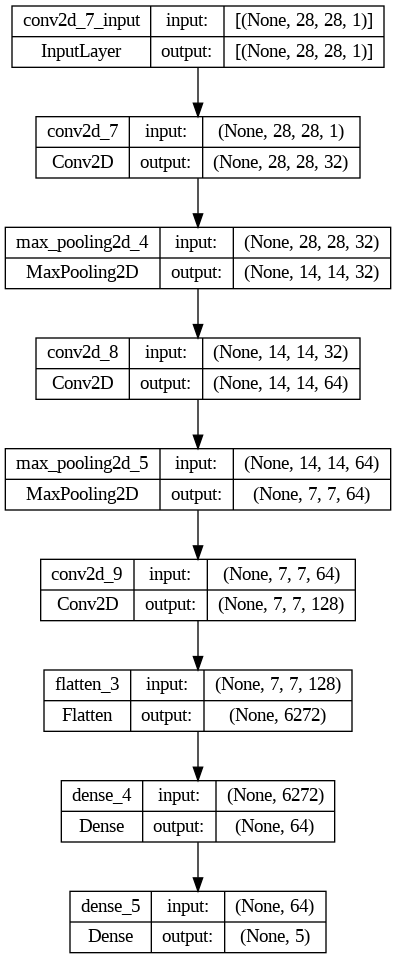

In [ ]:
plot_model(model_2, to_file=path_m2+'/model_2.png', show_shapes=True, show_layer_names=True)

# Architecture 3

## Hyperparameters
Regularization using early stopping not a good practice. We increase epochs based on the loss plot and added batch norm

In [ ]:
#Setting Image Parameters
Img_shape = 28
Num_classes = 5
test_size = 0.2
random_state = 1234
No_epochs = 20
Batch_size = 32

## Validation Split

In [ ]:
x_train_f, x_val_f, y_train_f, y_val_f = train_test_split(x_train_upd, y_train_upd,test_size=test_size, random_state=random_state)

## Model Architecture
Added batch normalization after every convolution layer for faster training


In [ ]:
model_2= tf.keras.Sequential()

In [ ]:

model_2.add(Conv2D(32,(3,3),strides=(1,1),padding='same'))
model_2.add(tf.keras.layers.BatchNormalization(synchronized=True))
model_2.add(tf.keras.layers.Activation('relu'))
model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(64,(3,3),strides=(1,1),padding='same'))
model_2.add(tf.keras.layers.BatchNormalization(synchronized=True))
model_2.add(tf.keras.layers.Activation('relu'))
model_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_2.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu'))
model_2.add(Flatten())

model_2.add(Dense(64,activation='relu'))

model_2.add(Dense(5,activation='softmax'))

In [ ]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
path_m3=path+'m3/'
if not os.path.exists(path_m3):
    os.makedirs(path_m3)

In [ ]:
start_time_3=time.time()
hist_2=model_2.fit(x_train_f, y_train_f,batch_size=Batch_size,epochs=No_epochs,verbose=1,validation_data=(x_val_f, y_val_f))
end_time_3=time.time()
with open(path_m3+'train_info.docx', 'a') as f:
    # Write the value to the file
    f.write('\n'+'Model 3 : '+str(end_time_3-start_time_3))
train_time.append(end_time_3-start_time_3)

Epoch 1/20
1500/1500 [==============================] - 14s 7ms/step - loss: 0.2895 - accuracy: 0.8936 - val_loss: 0.2201 - val_accuracy: 0.9194
Epoch 2/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1957 - accuracy: 0.9285 - val_loss: 0.2016 - val_accuracy: 0.9283
Epoch 3/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1644 - accuracy: 0.9398 - val_loss: 0.1866 - val_accuracy: 0.9310
Epoch 4/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1418 - accuracy: 0.9483 - val_loss: 0.1760 - val_accuracy: 0.9383
Epoch 5/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1203 - accuracy: 0.9570 - val_loss: 0.1856 - val_accuracy: 0.9356
Epoch 6/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1049 - accuracy: 0.9620 - val_loss: 0.2071 - val_accuracy: 0.9337
Epoch 7/20
1500/1500 [==============================] - 14s 10ms/step - loss: 0.0881 - accuracy: 0.9681 - val_loss: 0.1954 - val_a

In [ ]:
model_2.save(path_m3)

In [ ]:
score_3 = model_2.evaluate(x_test_upd, y_test_upd,batch_size=Batch_size)
print('Test loss:', score_3[0])
print('Test accuracy:', score_3[1])
with open(path_m3+'train_info.docx', 'a') as f:
    
    f.write('\n'+' Model 3 Test Accuracy : '+str(score_3[1]))


313/313 [==============================] - 1s 4ms/step - loss: 0.3046 - accuracy: 0.9373
Test loss: 0.3046368360519409
Test accuracy: 0.9373000264167786


In [ ]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)      

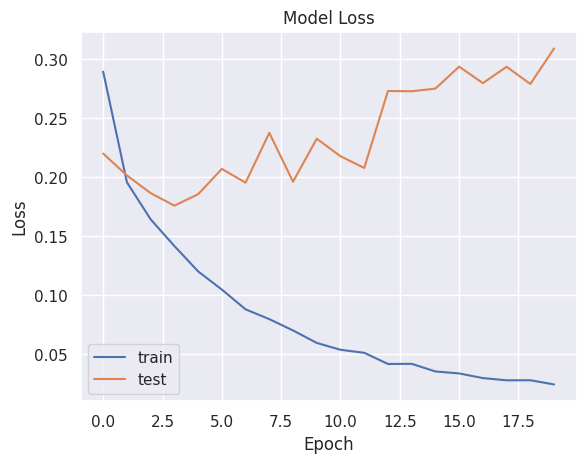

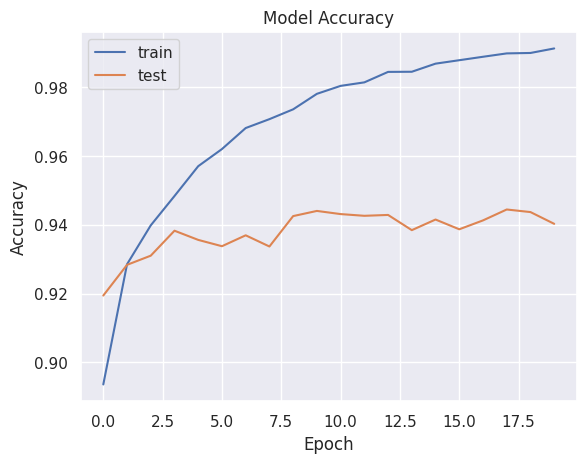

In [ ]:
# Plot the training and validation loss
sns.set(style='darkgrid')
sns.lineplot(data=hist_2.history['loss'], label='train')
sns.lineplot(data=hist_2.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig(path_m3+'/m3_loss.png')
plt.show()


# Plot the training and validation accuracy
sns.set(style='darkgrid')
sns.lineplot(data=hist_2.history['accuracy'], label='train')
sns.lineplot(data=hist_2.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(path_m3+'/m3_acc.png')
plt.show()


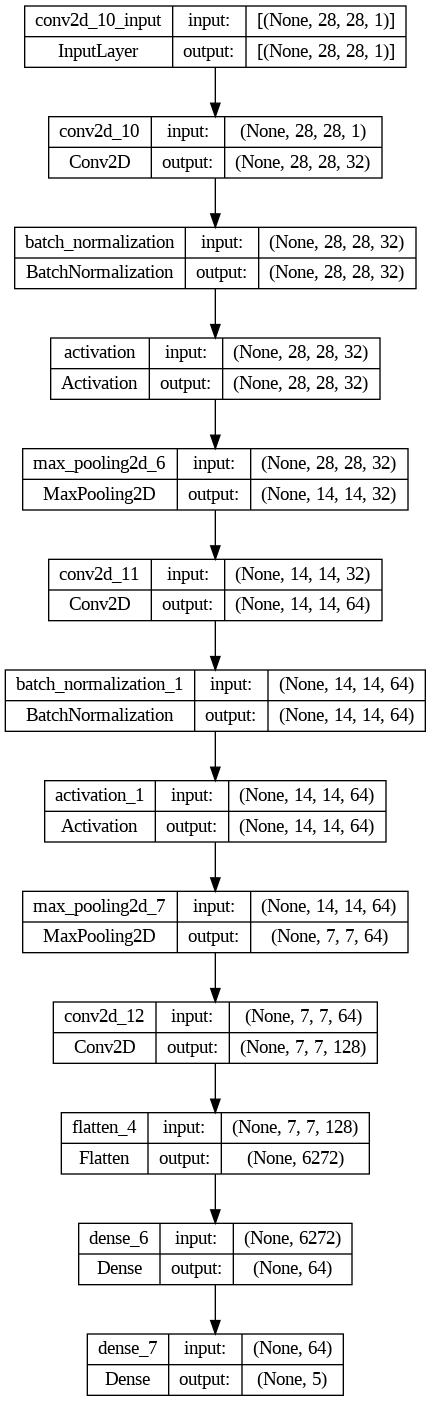

In [ ]:
plot_model(model_2, to_file=path_m3+'/model_3.png', show_shapes=True, show_layer_names=True)

# Architecture 4

## Hyperparameters
Regularization using early stopping not a good practice. We try DropOut instead

In [ ]:
#Setting Image Parameters
Img_shape = 28
Num_classes = 5
test_size = 0.2
random_state = 1234
No_epochs = 20
Batch_size = 32

## Validation Split

In [ ]:
x_train_f, x_val_f, y_train_f, y_val_f = train_test_split(x_train_upd, y_train_upd,test_size=test_size, random_state=random_state)

## Model Architecture
Regularization using Dropout Method to address overfitting


In [ ]:
model_4= tf.keras.Sequential()

In [ ]:

model_4.add(Conv2D(32,(3,3),strides=(1,1),padding='same'))
model_4.add(tf.keras.layers.BatchNormalization(synchronized=True))
model_4.add(tf.keras.layers.Activation('relu'))
model_4.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model_4.add(Conv2D(64,(3,3),strides=(1,1),padding='same'))
model_4.add(tf.keras.layers.BatchNormalization(synchronized=True))
model_4.add(tf.keras.layers.Activation('relu'))
model_4.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_4.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu'))
model_4.add(Flatten())

model_4.add(Dense(64,activation='relu'))
model_4.add(tf.keras.layers.Dropout(0.3))
model_4.add(Dense(5,activation='softmax'))

In [ ]:
model_4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
path_m4=path+'m4/'
if not os.path.exists(path_m4):
    os.makedirs(path_m4)

In [ ]:
start_time_4=time.time()
hist_4=model_4.fit(x_train_f, y_train_f,batch_size=Batch_size,epochs=No_epochs,verbose=1,validation_data=(x_val_f, y_val_f))
end_time_4=time.time()
with open(path_m4+'train_info.docx', 'a') as f:
    # Write the value to the file
    f.write('\n'+'Model 4 : '+str(end_time_4-start_time_4))
train_time.append(end_time_4-start_time_4)

Epoch 1/20
1500/1500 [==============================] - 13s 7ms/step - loss: 0.3776 - accuracy: 0.8599 - val_loss: 0.2384 - val_accuracy: 0.9112
Epoch 2/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2394 - accuracy: 0.9158 - val_loss: 0.2356 - val_accuracy: 0.9137
Epoch 3/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2003 - accuracy: 0.9289 - val_loss: 0.1997 - val_accuracy: 0.9287
Epoch 4/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1782 - accuracy: 0.9369 - val_loss: 0.1959 - val_accuracy: 0.9313
Epoch 5/20
1500/1500 [==============================] - 13s 8ms/step - loss: 0.1581 - accuracy: 0.9428 - val_loss: 0.1706 - val_accuracy: 0.9401
Epoch 6/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1425 - accuracy: 0.9488 - val_loss: 0.1778 - val_accuracy: 0.9383
Epoch 7/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1302 - accuracy: 0.9539 - val_loss: 0.1718 - val_acc

In [ ]:

model_4.save(path_m4)

In [ ]:
score_4 = model_4.evaluate(x_test_upd, y_test_upd,batch_size=Batch_size)
print('Test loss:', score_4[0])
print('Test accuracy:', score_4[1])
with open(path_m4+'train_info.docx', 'a') as f:
    # Write the value to the file
    f.write('\n'+' Model 4 Test Accuracy : '+str(score_4[1]))


313/313 [==============================] - 1s 4ms/step - loss: 0.3162 - accuracy: 0.9365
Test loss: 0.3161718249320984
Test accuracy: 0.9365000128746033


In [ ]:
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 14, 14, 64)      

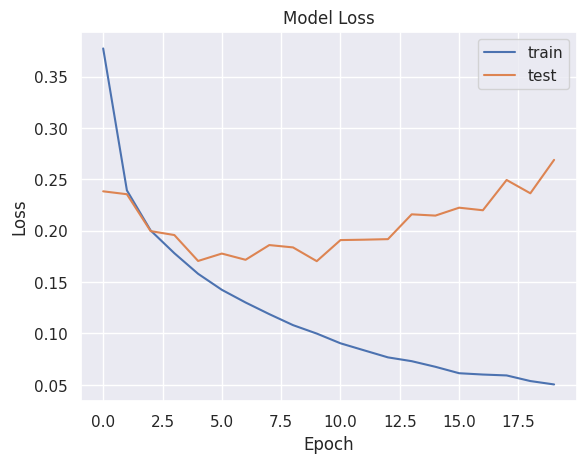

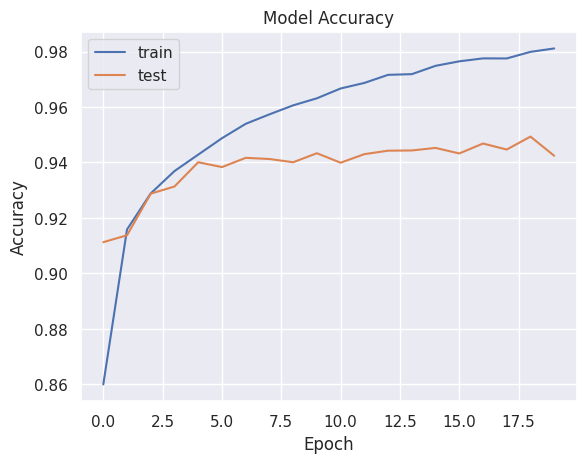

In [ ]:
# Plot the training and validation loss
sns.set(style='darkgrid')
sns.lineplot(data=hist_4.history['loss'], label='train')
sns.lineplot(data=hist_4.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig(path_m4+'/m4_loss.png')
plt.show()


# Plot the training and validation accuracy
sns.set(style='darkgrid')
sns.lineplot(data=hist_4.history['accuracy'], label='train')
sns.lineplot(data=hist_4.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(path_m4+'/m4_acc.png')
plt.show()


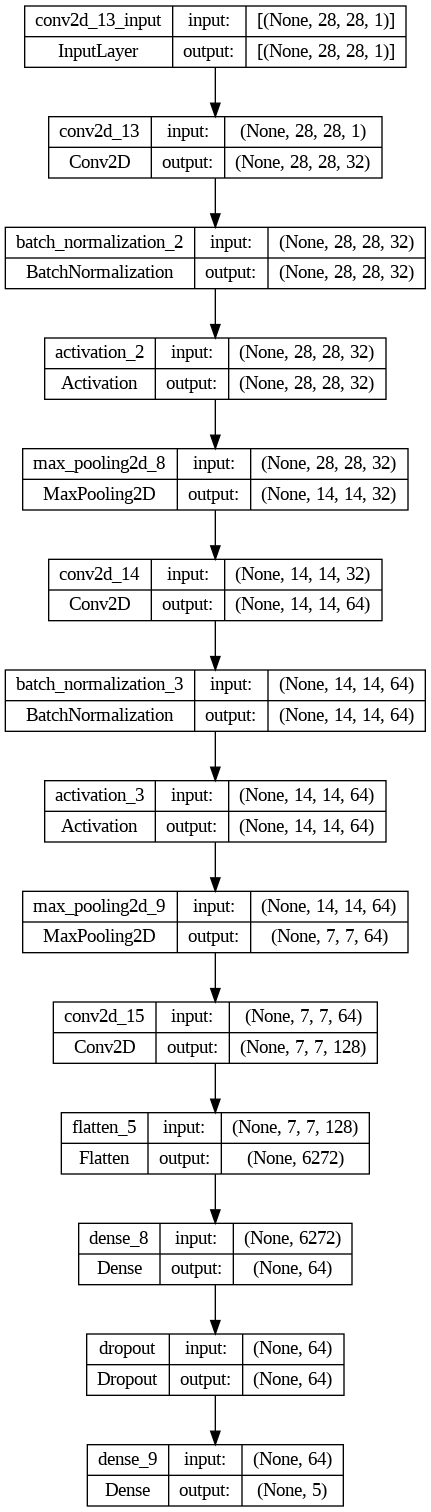

In [ ]:
plot_model(model_4, to_file=path_m4+'/model_4.png', show_shapes=True, show_layer_names=True)

#Architecture 5

Changing depth

In [ ]:
Img_shape = 28
Num_classes = 5
test_size = 0.2
random_state = 1234
No_epochs = 30
Batch_size = 32

In [ ]:
depth_list=[4,6,8]

In [ ]:
def add_conv_block(depth_list,x_train_f, x_val_f, y_train_f, y_val_f):
  hist=[]
  models=[]
  path='/content/drive/My Drive/models_as3_dup/'
  for depth in depth_list:
    model= tf.keras.Sequential()
    print("Model with depth",depth)
    models.append(model)
    fil_num=32
    for i in range(1,depth+1):
      model.add(Conv2D(32,(3,3),strides=(1,1),padding='same'))
      fil_num=fil_num*2
      model.add(tf.keras.layers.BatchNormalization(synchronized=True))
      model.add(tf.keras.layers.Activation('relu'))
      model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='same'))
      
    model.add(Conv2D(fil_num,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Flatten())
    model.add(Dense(64,activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(Dense(5,activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])
    print("Model Compiled")
    start_time=time.time()
    histx=model.fit(x_train_f, y_train_f,batch_size=Batch_size,epochs=No_epochs,verbose=1,validation_data=(x_val_f, y_val_f))
    print("Model Trained")
    end_time=time.time()
   
    train_time.append(end_time-start_time)
    hist.append(histx)
    path_=path+'/m5/depth_'+str(depth)+'/'
    if not os.path.exists(path_):
      os.makedirs(path_)
    with open(path_+'train_info.docx', 'a') as f:
    # Write the value to the file
      f.write('\n'+'Model 5 with depth '+ str(depth)+' : '+str(end_time-start_time))
    model.save(path_)
  return hist,models
  

    



In [ ]:
x_train_f, x_val_f, y_train_f, y_val_f = train_test_split(x_train_upd, y_train_upd,test_size=test_size, random_state=random_state)

In [ ]:
hist_,models_=add_conv_block(depth_list,x_train_f, x_val_f, y_train_f, y_val_f)

Model with depth 4
Model Compiled
Epoch 1/30
1500/1500 [==============================] - 18s 9ms/step - loss: 0.3950 - accuracy: 0.8577 - val_loss: 0.4056 - val_accuracy: 0.8553
Epoch 2/30
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2473 - accuracy: 0.9135 - val_loss: 0.2209 - val_accuracy: 0.9162
Epoch 3/30
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2126 - accuracy: 0.9259 - val_loss: 0.2046 - val_accuracy: 0.9267
Epoch 4/30
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1855 - accuracy: 0.9351 - val_loss: 0.2215 - val_accuracy: 0.9207
Epoch 5/30
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1687 - accuracy: 0.9397 - val_loss: 0.1825 - val_accuracy: 0.9331
Epoch 6/30
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1559 - accuracy: 0.9445 - val_loss: 0.1896 - val_accuracy: 0.9313
Epoch 7/30
1500/1500 [==============================] - 14s 10ms/step - loss: 0.1437 - accuracy:

Model with depth 6
Model Compiled
Epoch 1/30
1500/1500 [==============================] - 23s 11ms/step - loss: 0.3925 - accuracy: 0.8600 - val_loss: 0.3733 - val_accuracy: 0.8534
Epoch 2/30
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2714 - accuracy: 0.9062 - val_loss: 0.2344 - val_accuracy: 0.9196
Epoch 3/30
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2367 - accuracy: 0.9188 - val_loss: 0.2084 - val_accuracy: 0.9251
Epoch 4/30
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2125 - accuracy: 0.9266 - val_loss: 0.2185 - val_accuracy: 0.9249
Epoch 5/30
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1969 - accuracy: 0.9310 - val_loss: 0.2428 - val_accuracy: 0.9202
Epoch 6/30
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1818 - accuracy: 0.9371 - val_loss: 0.2504 - val_accuracy: 0.9103
Epoch 7/30
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1705 - acc

Model with depth 8
Model Compiled
Epoch 1/30
1500/1500 [==============================] - 28s 12ms/step - loss: 0.4620 - accuracy: 0.8390 - val_loss: 0.3681 - val_accuracy: 0.8739
Epoch 2/30
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3097 - accuracy: 0.8931 - val_loss: 0.2878 - val_accuracy: 0.9035
Epoch 3/30
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2642 - accuracy: 0.9122 - val_loss: 0.2684 - val_accuracy: 0.9104
Epoch 4/30
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2383 - accuracy: 0.9198 - val_loss: 0.2572 - val_accuracy: 0.9094
Epoch 5/30
1500/1500 [==============================] - 17s 12ms/step - loss: 0.2172 - accuracy: 0.9261 - val_loss: 0.2183 - val_accuracy: 0.9215
Epoch 6/30
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2045 - accuracy: 0.9303 - val_loss: 0.1914 - val_accuracy: 0.9315
Epoch 7/30
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1914 - acc

In [ ]:
accuracy_list=[] 
loss_list=[]
for model in models_:
  score=model.evaluate(x_test_upd, y_test_upd,batch_size=Batch_size)
  accuracy_list.append(score[1])
  loss_list.append(score[0])
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
print("Accuracy scores",accuracy_list)

313/313 [==============================] - 1s 4ms/step - loss: 0.3799 - accuracy: 0.9376
Test loss: 0.3799460232257843
Test accuracy: 0.9376000165939331
313/313 [==============================] - 2s 4ms/step - loss: 0.3029 - accuracy: 0.9324
Test loss: 0.30293601751327515
Test accuracy: 0.9323999881744385
313/313 [==============================] - 2s 5ms/step - loss: 0.2557 - accuracy: 0.9321
Test loss: 0.25567200779914856
Test accuracy: 0.9320999979972839
Accuracy scores [0.9376000165939331, 0.9323999881744385, 0.9320999979972839]


In [ ]:
def plot_metric(history,type,model_num):
  
  sns.set(style='darkgrid')
  if type=='loss':
    sns.lineplot(data=history.history['loss'], label='train')
    sns.lineplot(data=history.history['val_loss'], label='test')
  elif type=='accuracy':
    sns.lineplot(data=history.history['accuracy'], label='train')
    sns.lineplot(data=history.history['val_accuracy'], label='test')

  plt.title('Model '+model_num+' '+type)
  plt.xlabel('Epoch')
  plt.ylabel(type)
  plt.legend()
  plt.savefig('/content/drive/My Drive/models_as3_dup/m5/'+model_num+type)
  plt.show()


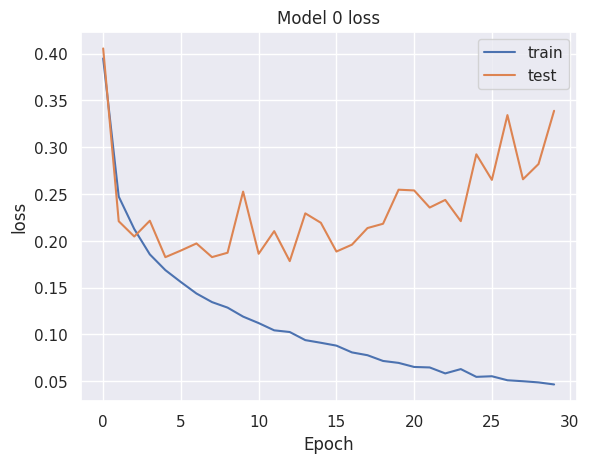

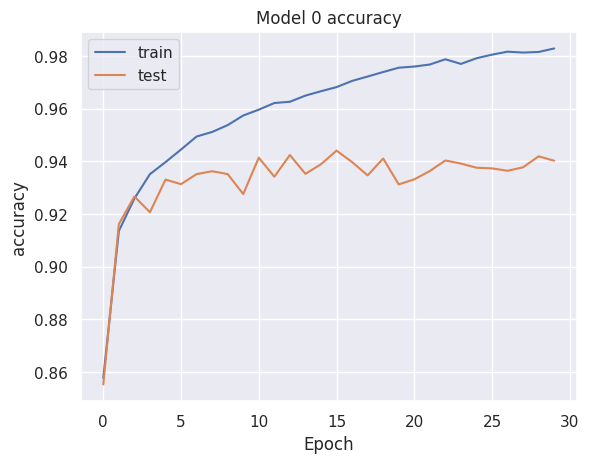

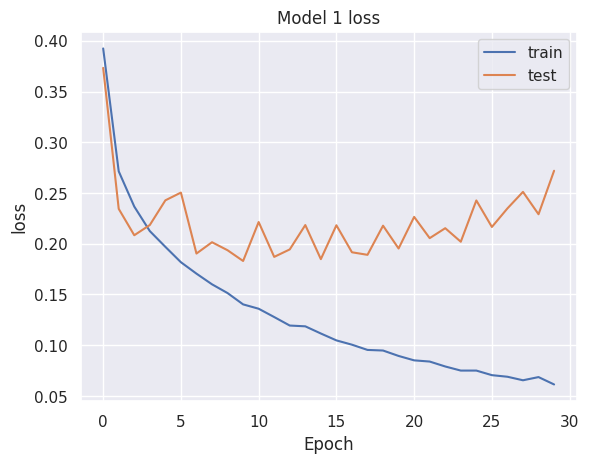

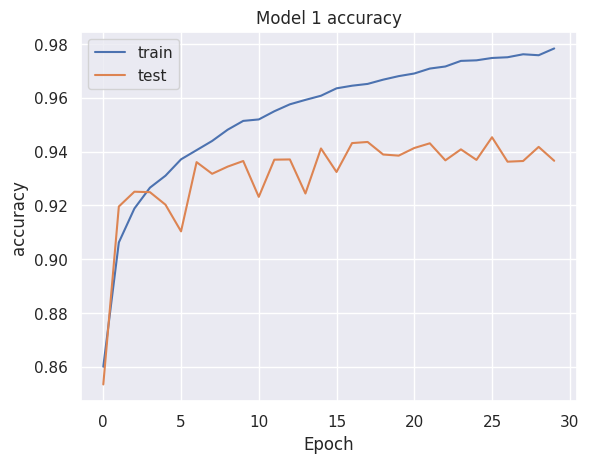

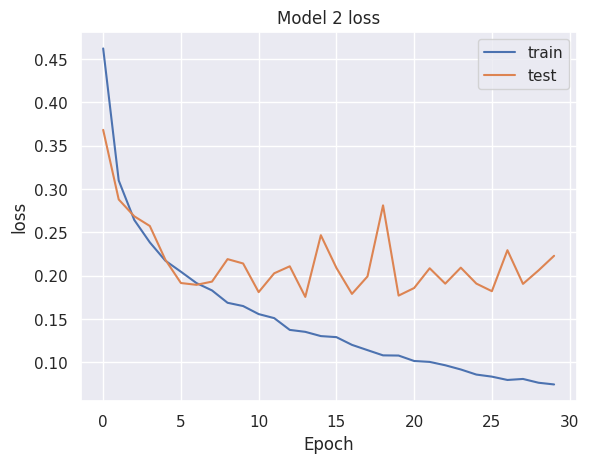

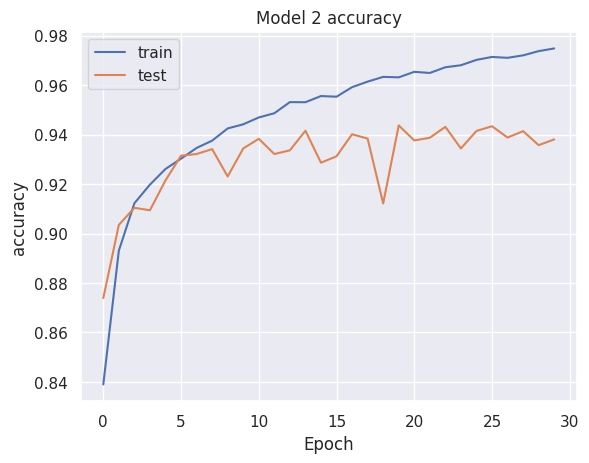

In [ ]:
for history in hist_:
  plot_metric(history,'loss',str(hist_.index(history)))
  plot_metric(history,'accuracy',str(hist_.index(history)))


# Visualise Runtime peformance of Models

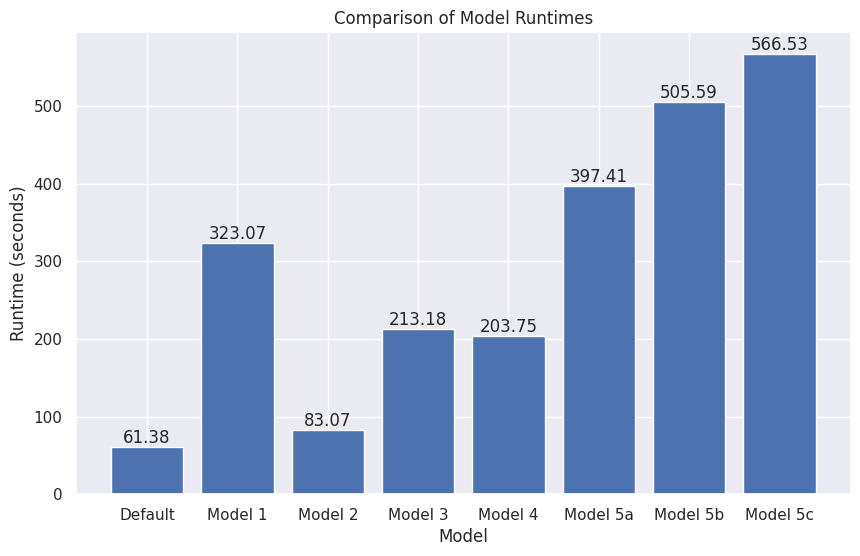

In [ ]:



models = ['Default','Model 1', 'Model 2','Model 3','Model 4','Model 5a','Model 5b','Model 5c']


fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(models, train_time)


for i, v in enumerate(train_time):
    ax.text(i, v, str(round(v,2)), ha='center', va='bottom')

ax.set_xlabel('Model')
ax.set_ylabel('Runtime (seconds)')
ax.set_title('Comparison of Model Runtimes')
plt.savefig(path+'rt.png')
plt.show()

In [ ]:
model_t = load_model('/content/drive/My Drive/models_as3_dup/default')

# Make predictions with loaded model
start_t=time.time()
score_1 = model_t.evaluate(x_test_upd, y_test_upd,batch_size=Batch_size)
end_t=time.time()
print(" Test Duration",end_t-start_t)

313/313 [==============================] - 1s 4ms/step - loss: 0.2781 - accuracy: 0.8979
 Test Duration 1.352442979812622


#Question 4

# Import Libraries

In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import random
from sklearn.cluster import KMeans, DBSCAN
import warnings
warnings.filterwarnings("ignore")

random.seed(69)
%matplotlib inline

# Loading the model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -R "/content/drive/MyDrive/ECE 657A/Assignment_3/m2" /content/m2

In [ ]:
model = load_model("m2")

In [ ]:
model.layers

In [ ]:
# model.get_layer("0x7fbd71ff06a0")

##Importing Datasets

In [ ]:
# x_train=pd.read_csv('x_train.csv')
# y_train=pd.read_csv('y_train.csv')
!cp "/content/drive/MyDrive/ECE 657A/Assignment_3/x_test.csv" /content/x_test.csv
!cp "/content/drive/MyDrive/ECE 657A/Assignment_3/y_test.csv" /content/y_test.csv
x_test=pd.read_csv('x_test.csv')
y_test=pd.read_csv('y_test.csv')

##Reshaping and Normalising the datasets

In [ ]:
def data_preprocessing(raw):
    num_images = raw.shape[0]
    x_as_array = raw.values[:,:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    image = x_shaped_array / 255
    return image
  
y_test_final=tf.keras.utils.to_categorical(y_test, 5)
x_test_final= data_preprocessing(x_test)
# y_test_upd=tf.keras.utils.to_categorical(y_test, 5)
# x_test_upd= data_preprocessing(x_test)

# Generating encoding

In [ ]:
layer_name = 'dense_4'
intermediate_layer_model = keras.Model(inputs=model.input,
                                       outputs=model.get_layer(layer_name).output)


In [ ]:
intermediate_output = intermediate_layer_model(x_test_final)

In [ ]:
intermediate_output.shape

TensorShape([10000, 64])

# PCA

In [ ]:
pca = PCA()
pca_transformed = pca.fit_transform(intermediate_output)
pca_transformed.shape

(10000, 64)

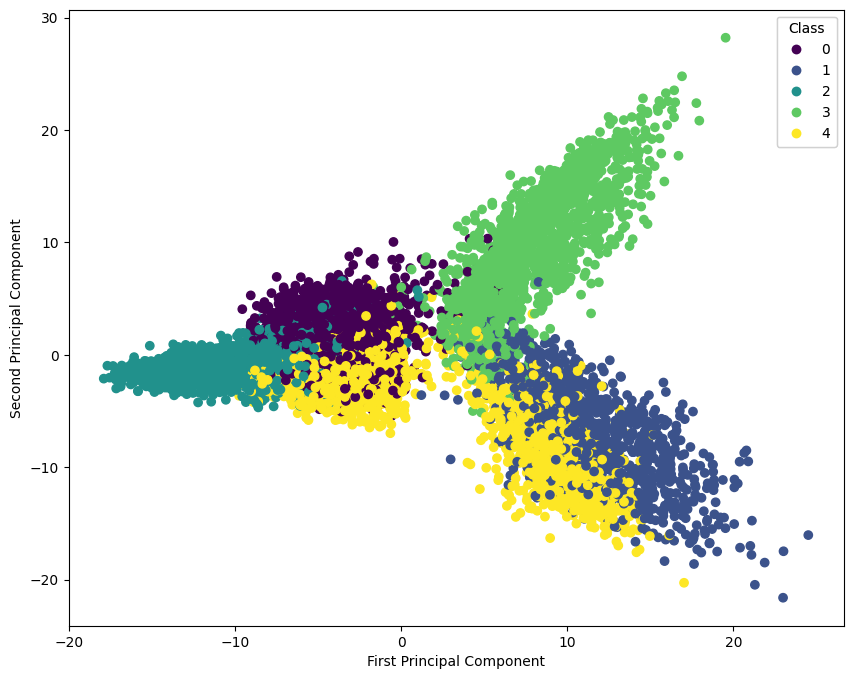

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
# plt.figure(figsize=(8,6))
scatter = ax.scatter(pca_transformed[:,0],pca_transformed[:,1], c = y_test.values)
legend1 = ax.legend(*scatter.legend_elements(num=4),
                    loc="best", title="Class")
ax.add_artist(legend1)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
# plt.legend(title='Quality', loc='best', labels= wine_data['quality'].unique())
plt.show()

# K-means

In [ ]:
kmeans = KMeans(n_clusters=5).fit(intermediate_output)

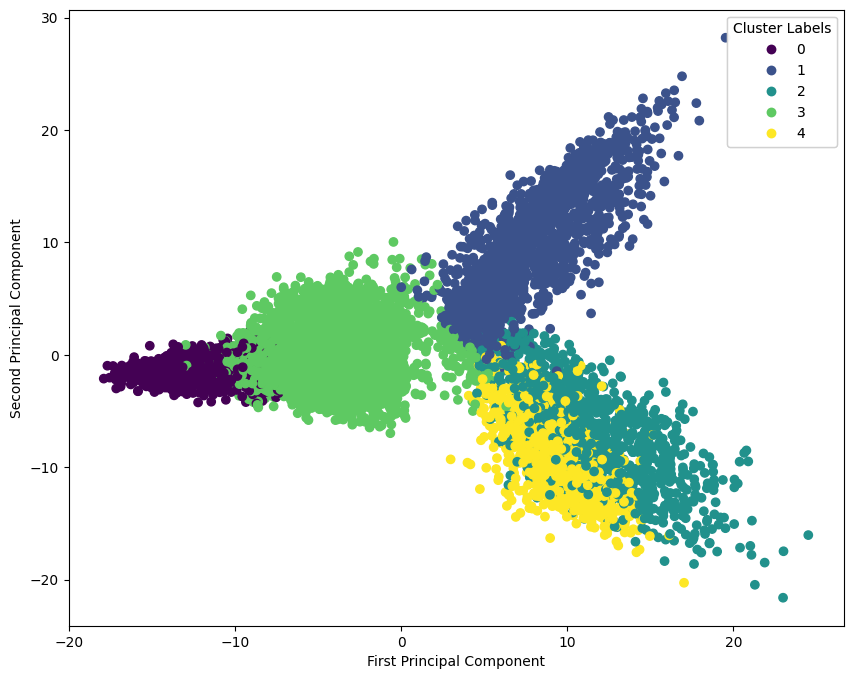

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
# plt.figure(figsize=(8,6))
scatter = ax.scatter(pca_transformed[:,0],pca_transformed[:,1], c = kmeans.labels_)
legend1 = ax.legend(*scatter.legend_elements(num=4),
                    loc="best", title="Cluster Labels")
ax.add_artist(legend1)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
# plt.legend(title='Quality', loc='best', labels= wine_data['quality'].unique())
plt.show()

In [ ]:
pca_transformed[:,0].shape

(10000,)

# DBSCAN

In [ ]:
dbscan = DBSCAN().fit(intermediate_output)

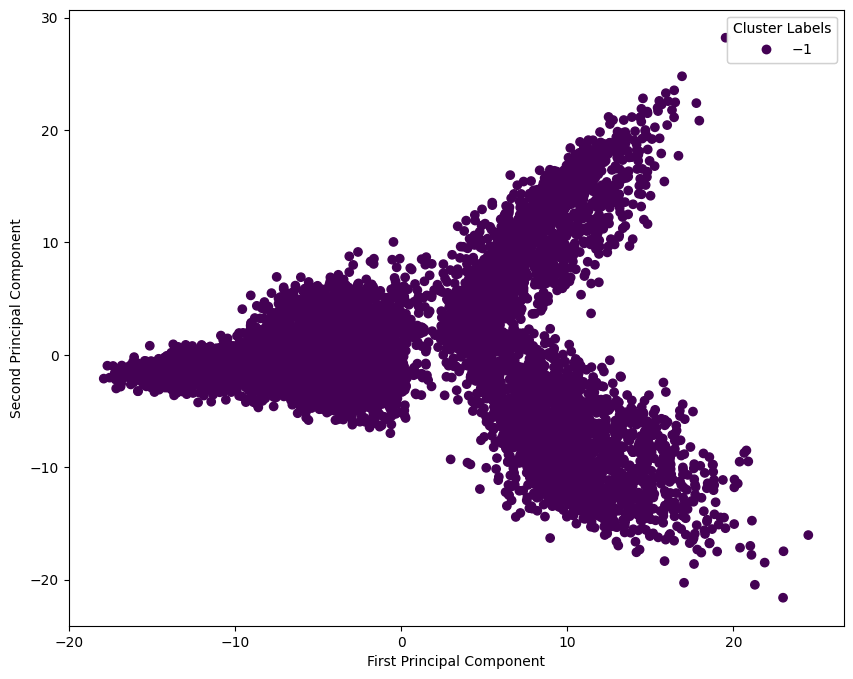

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
# plt.figure(figsize=(8,6))
scatter = ax.scatter(pca_transformed[:,0],pca_transformed[:,1], c = dbscan.labels_)
legend1 = ax.legend(*scatter.legend_elements(num=4),
                    loc="best", title="Cluster Labels")
ax.add_artist(legend1)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
# plt.legend(title='Quality', loc='best', labels= wine_data['quality'].unique())
plt.show()

# t-SNE

In [ ]:
tsne = TSNE()
tsne_transformed = tsne.fit_transform(intermediate_output)

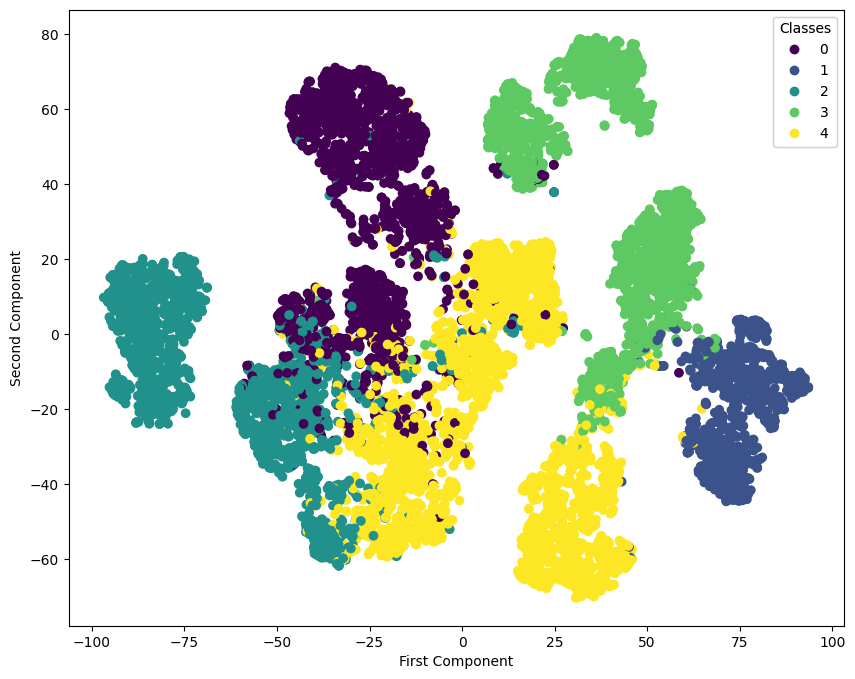

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
scatter = ax.scatter(tsne_transformed[:,0],tsne_transformed[:,1],c = y_test.values)
legend1 = ax.legend(*scatter.legend_elements(num=4),
                    loc="best", title="Classes")
ax.add_artist(legend1)
ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

# create some sample data
df = pd.DataFrame({
    'First Principal Component': tsne_transformed[:,0],
    'Second Principal Component': tsne_transformed[:,1],
    'Class labels': y_test.values.flatten()
})

# create the scatter plot
fig = px.scatter(df, x='First Principal Component', y='Second Principal Component', color='Class labels', hover_name='Class labels')

# set the plot title
fig.update_layout(title='Interactive Scatter Plot', width=800, height=600)

# display the plot
fig.show()

# Analysing classes to determine labels

# t-SNE

## Class 3

### Sneakers

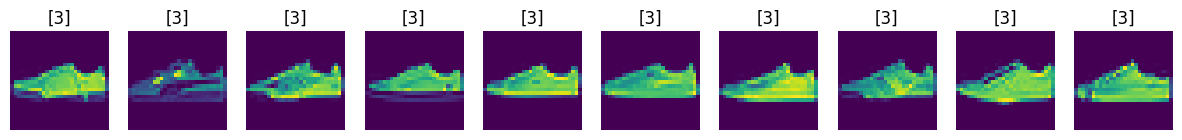

In [ ]:
#blob 1
x1, x2 = 50, 60
y1, y2 = 20, 30

indices = np.where((tsne_transformed[:,0] > x1) & (tsne_transformed[:,0] < x2) & (tsne_transformed[:,1] > y1) & (tsne_transformed[:,1] < y2))
random_idx = np.random.choice(indices[0],size=10, replace=False)
fig, axes = plt.subplots(1, 10, figsize=(15, 3), sharex=True, sharey=True)
for i, idx in enumerate(random_idx):
    axes[i].imshow(x_test_final[idx])
    axes[i].set_axis_off()
    axes[i].set_title("{}".format(y_test.iloc[idx].values))
plt.show()

### Bags with handles

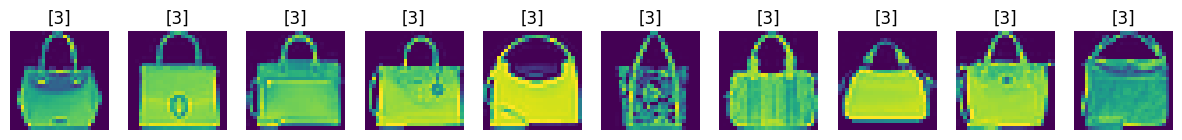

In [ ]:
#blob 2
x1, x2 = 30, 40
y1, y2 = 70, 80

indices = np.where((tsne_transformed[:,0] > x1) & (tsne_transformed[:,0] < x2) & (tsne_transformed[:,1] > y1) & (tsne_transformed[:,1] < y2))
random_idx = np.random.choice(indices[0],size=10, replace=False)
fig, axes = plt.subplots(1, 10, figsize=(15, 3), sharex=True, sharey=True)
for i, idx in enumerate(random_idx):
    axes[i].imshow(x_test_final[idx])
    axes[i].set_axis_off()
    axes[i].set_title("{}".format(y_test.iloc[idx].values))
plt.show()

### Bags without handles (purse)

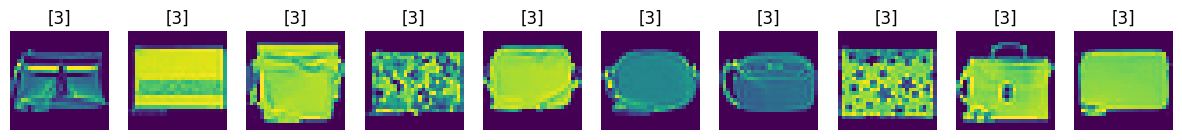

In [ ]:
#blob 3
x1, x2 = 11, 20
y1, y2 = 54, 58

indices = np.where((tsne_transformed[:,0] > x1) & (tsne_transformed[:,0] < x2) & (tsne_transformed[:,1] > y1) & (tsne_transformed[:,1] < y2))
random_idx = np.random.choice(indices[0],size=10, replace=False)
fig, axes = plt.subplots(1, 10, figsize=(15, 3), sharex=True, sharey=True)
for i, idx in enumerate(random_idx):
    axes[i].imshow(x_test_final[idx])
    axes[i].set_axis_off()
    axes[i].set_title("{}".format(y_test.iloc[idx].values))
plt.show()

## Class 4

### Ankle Boots

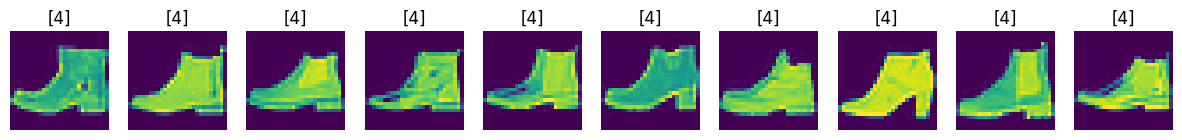

In [ ]:
#blob 3
x1, x2 = 22, 37
y1, y2 = -60, -40

indices = np.where((tsne_transformed[:,0] > x1) & (tsne_transformed[:,0] < x2) & (tsne_transformed[:,1] > y1) & (tsne_transformed[:,1] < y2))
random_idx = np.random.choice(indices[0],size=10, replace=False)
fig, axes = plt.subplots(1, 10, figsize=(15, 3), sharex=True, sharey=True)
for i, idx in enumerate(random_idx):
    axes[i].imshow(x_test_final[idx])
    axes[i].set_axis_off()
    axes[i].set_title("{}".format(y_test.iloc[idx].values))
plt.show()

### Dresses

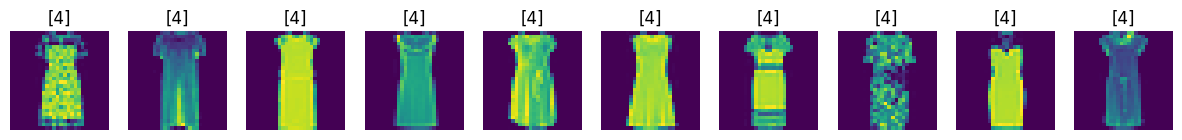

In [ ]:
#blob 3
x1, x2 = 10, 21
y1, y2 = 12, 23

indices = np.where((tsne_transformed[:,0] > x1) & (tsne_transformed[:,0] < x2) & (tsne_transformed[:,1] > y1) & (tsne_transformed[:,1] < y2))
random_idx = np.random.choice(indices[0],size=10, replace=False)
fig, axes = plt.subplots(1, 10, figsize=(15, 3), sharex=True, sharey=True)
for i, idx in enumerate(random_idx):
    axes[i].imshow(x_test_final[idx])
    axes[i].set_axis_off()
    axes[i].set_title("{}".format(y_test.iloc[idx].values))
plt.show()

### Dresses (full sleeves)

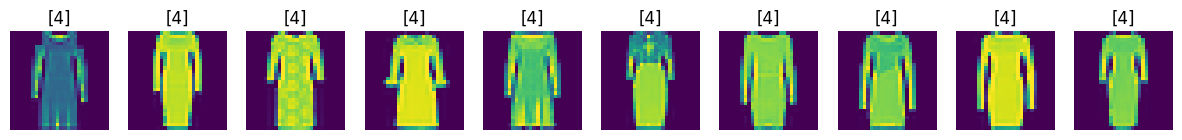

In [ ]:
#blob 3
x1, x2 = 4, 12
y1, y2 = -16, -4

indices = np.where((tsne_transformed[:,0] > x1) & (tsne_transformed[:,0] < x2) & (tsne_transformed[:,1] > y1) & (tsne_transformed[:,1] < y2))
random_idx = np.random.choice(indices[0],size=10, replace=False)
fig, axes = plt.subplots(1, 10, figsize=(15, 3), sharex=True, sharey=True)
for i, idx in enumerate(random_idx):
    axes[i].imshow(x_test_final[idx])
    axes[i].set_axis_off()
    axes[i].set_title("{}".format(y_test.iloc[idx].values))
plt.show()

### Coats

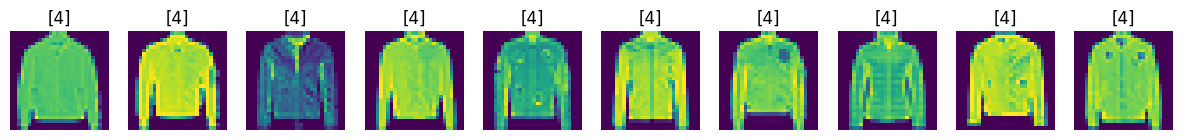

In [ ]:
#blob 3
x1, x2 = -16, -10
y1, y2 = -41, -34

indices = np.where((tsne_transformed[:,0] > x1) & (tsne_transformed[:,0] < x2) & (tsne_transformed[:,1] > y1) & (tsne_transformed[:,1] < y2))
random_idx = np.random.choice(indices[0],size=10, replace=False)
fig, axes = plt.subplots(1, 10, figsize=(15, 3), sharex=True, sharey=True)
for i, idx in enumerate(random_idx):
    axes[i].imshow(x_test_final[idx])
    axes[i].set_axis_off()
    axes[i].set_title("{}".format(y_test.iloc[idx].values))
plt.show()

## Class 2

### Trousers

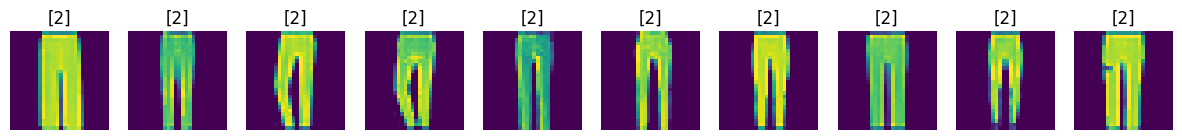

In [ ]:
#blob 3
x1, x2 = -100, -70
y1, y2 = -20, 20

indices = np.where((tsne_transformed[:,0] > x1) & (tsne_transformed[:,0] < x2) & (tsne_transformed[:,1] > y1) & (tsne_transformed[:,1] < y2))
random_idx = np.random.choice(indices[0],size=10, replace=False)
fig, axes = plt.subplots(1, 10, figsize=(15, 3), sharex=True, sharey=True)
for i, idx in enumerate(random_idx):
    axes[i].imshow(x_test_final[idx])
    axes[i].set_axis_off()
    axes[i].set_title("{}".format(y_test.iloc[idx].values))
plt.show()

#### Shirts

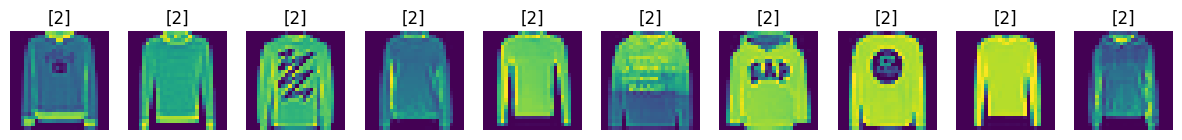

In [ ]:
#blob 3
x1, x2 = -59, -50
y1, y2 = -40, -24

indices = np.where((tsne_transformed[:,0] > x1) & (tsne_transformed[:,0] < x2) & (tsne_transformed[:,1] > y1) & (tsne_transformed[:,1] < y2))
random_idx = np.random.choice(indices[0],size=10, replace=False)
fig, axes = plt.subplots(1, 10, figsize=(15, 3), sharex=True, sharey=True)
for i, idx in enumerate(random_idx):
    axes[i].imshow(x_test_final[idx])
    axes[i].set_axis_off()
    axes[i].set_title("{}".format(y_test.iloc[idx].values))
plt.show()

### Pull overs

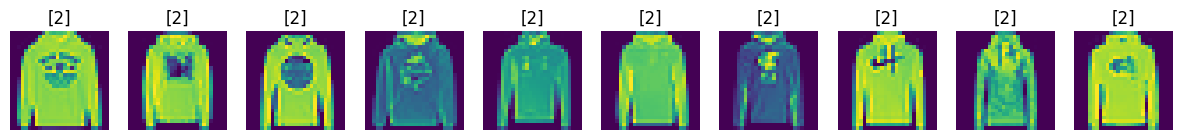

In [ ]:
#blob 3
x1, x2 = -40, -35
y1, y2 = -60, -53

indices = np.where((tsne_transformed[:,0] > x1) & (tsne_transformed[:,0] < x2) & (tsne_transformed[:,1] > y1) & (tsne_transformed[:,1] < y2))
random_idx = np.random.choice(indices[0],size=10, replace=False)
fig, axes = plt.subplots(1, 10, figsize=(15, 3), sharex=True, sharey=True)
for i, idx in enumerate(random_idx):
    axes[i].imshow(x_test_final[idx])
    axes[i].set_axis_off()
    axes[i].set_title("{}".format(y_test.iloc[idx].values))
plt.show()

## Class 0

### t-shirts

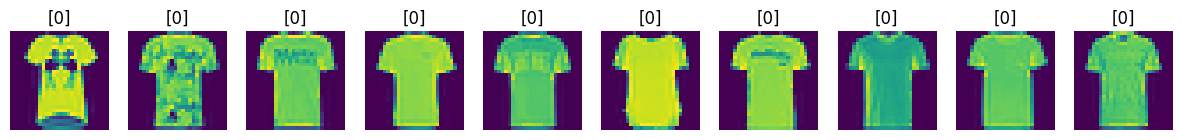

In [ ]:
#blob 3
x1, x2 = -40, -20
y1, y2 = 55, 65

indices = np.where((tsne_transformed[:,0] > x1) & (tsne_transformed[:,0] < x2) & (tsne_transformed[:,1] > y1) & (tsne_transformed[:,1] < y2))
random_idx = np.random.choice(indices[0],size=10, replace=False)
fig, axes = plt.subplots(1, 10, figsize=(15, 3), sharex=True, sharey=True)
for i, idx in enumerate(random_idx):
    axes[i].imshow(x_test_final[idx])
    axes[i].set_axis_off()
    axes[i].set_title("{}".format(y_test.iloc[idx].values))
plt.show()

### Shirts

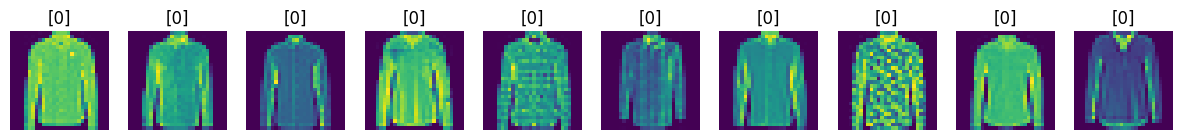

In [ ]:
x1, x2 = -30, -15
y1, y2 = 0, 15

indices = np.where((tsne_transformed[:,0] > x1) & (tsne_transformed[:,0] < x2) & (tsne_transformed[:,1] > y1) & (tsne_transformed[:,1] < y2))
random_idx = np.random.choice(indices[0],size=10, replace=False)
fig, axes = plt.subplots(1, 10, figsize=(15, 3), sharex=True, sharey=True)
for i, idx in enumerate(random_idx):
    axes[i].imshow(x_test_final[idx])
    axes[i].set_axis_off()
    axes[i].set_title("{}".format(y_test.iloc[idx].values))
plt.show()

### Tops

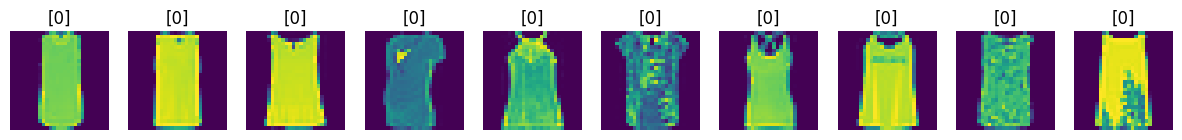

In [ ]:
x1, x2 = -20, -5
y1, y2 = 25, 40

indices = np.where((tsne_transformed[:,0] > x1) & (tsne_transformed[:,0] < x2) & (tsne_transformed[:,1] > y1) & (tsne_transformed[:,1] < y2))
random_idx = np.random.choice(indices[0],size=10, replace=False)
fig, axes = plt.subplots(1, 10, figsize=(15, 3), sharex=True, sharey=True)
for i, idx in enumerate(random_idx):
    axes[i].imshow(x_test_final[idx])
    axes[i].set_axis_off()
    axes[i].set_title("{}".format(y_test.iloc[idx].values))
plt.show()

## Class 1

### Sandals (flats)

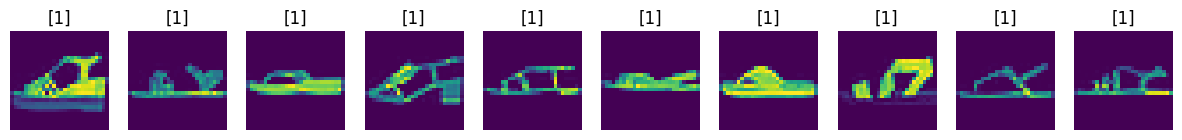

In [ ]:
x1, x2 = 70, 100
y1, y2 = -25, 5

indices = np.where((tsne_transformed[:,0] > x1) & (tsne_transformed[:,0] < x2) & (tsne_transformed[:,1] > y1) & (tsne_transformed[:,1] < y2))
random_idx = np.random.choice(indices[0],size=10, replace=False)
fig, axes = plt.subplots(1, 10, figsize=(15, 3), sharex=True, sharey=True)
for i, idx in enumerate(random_idx):
    axes[i].imshow(x_test_final[idx])
    axes[i].set_axis_off()
    axes[i].set_title("{}".format(y_test.iloc[idx].values))
plt.show()

### High heels

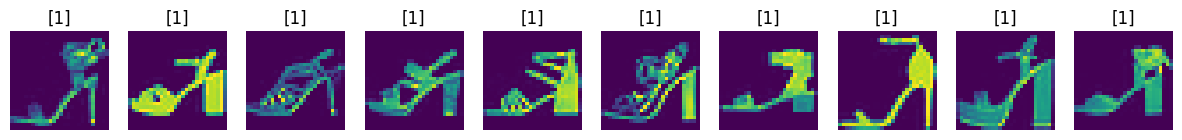

In [ ]:
x1, x2 = 65, 80
y1, y2 = -45, -25

indices = np.where((tsne_transformed[:,0] > x1) & (tsne_transformed[:,0] < x2) & (tsne_transformed[:,1] > y1) & (tsne_transformed[:,1] < y2))
random_idx = np.random.choice(indices[0],size=10, replace=False)
fig, axes = plt.subplots(1, 10, figsize=(15, 3), sharex=True, sharey=True)
for i, idx in enumerate(random_idx):
    axes[i].imshow(x_test_final[idx])
    axes[i].set_axis_off()
    axes[i].set_title("{}".format(y_test.iloc[idx].values))
plt.show()

# k-means analysis

K-means cluster number: 0


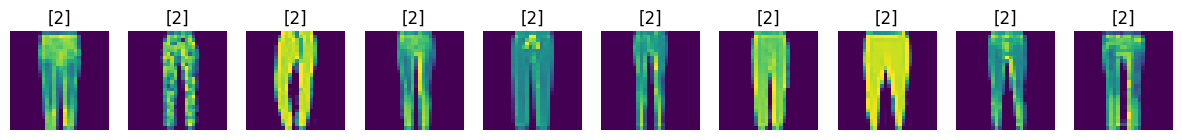

K-means cluster number: 1


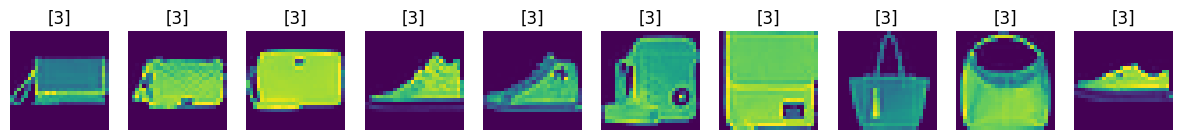

K-means cluster number: 2


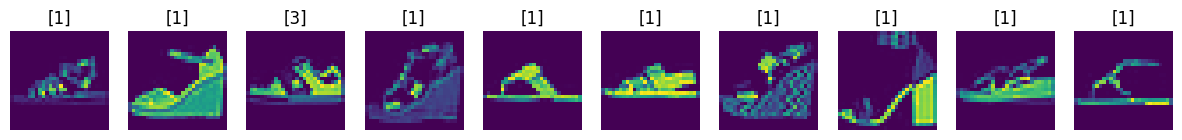

K-means cluster number: 3


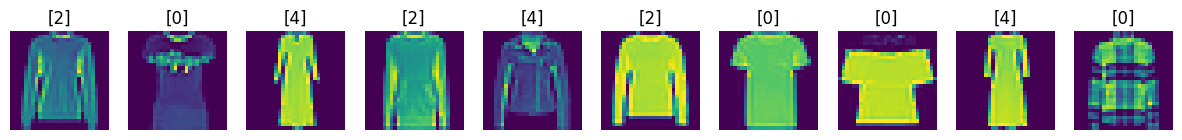

K-means cluster number: 4


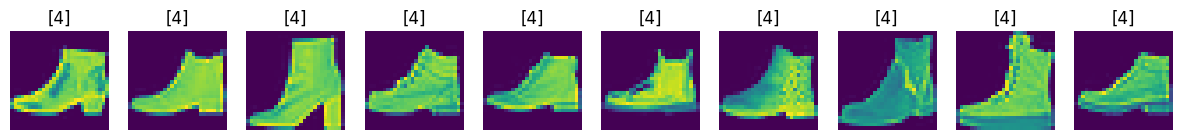

In [ ]:
for kmeans_cluster_label in range(5):
  x_selected, y_selected = x_test_final[np.where(kmeans.labels_ == kmeans_cluster_label)[0]], y_test.iloc[np.where(kmeans.labels_ == kmeans_cluster_label)[0],:].values
  random_idx = np.random.choice(x_selected.shape[0],size=10, replace=False)
  fig, axes = plt.subplots(1, 10, figsize=(15, 3), sharex=True, sharey=True)
  print("K-means cluster number: {}".format(kmeans_cluster_label))
  for i, idx in enumerate(random_idx):
      axes[i].imshow(x_selected[idx])
      axes[i].set_axis_off()
      axes[i].set_title("{}".format(y_selected[idx]))
  
  plt.show()

### Printing images directly from the dataset

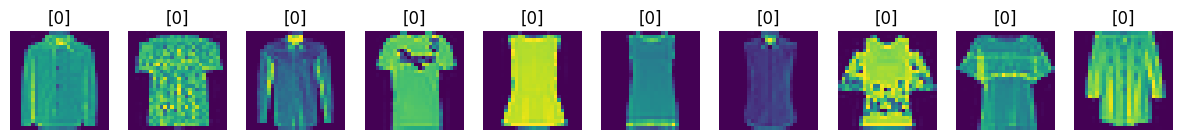

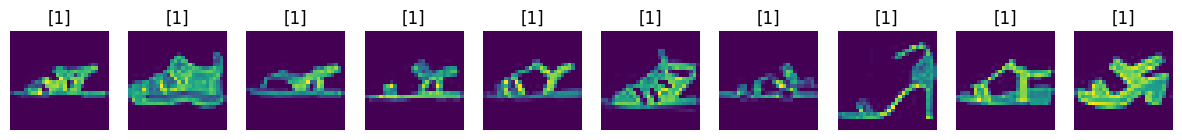

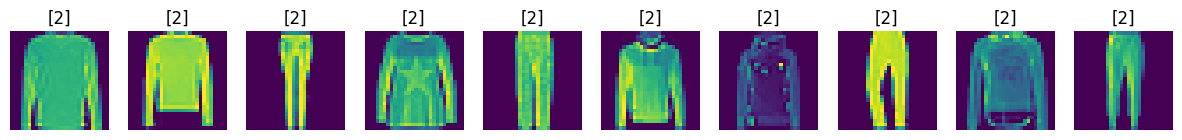

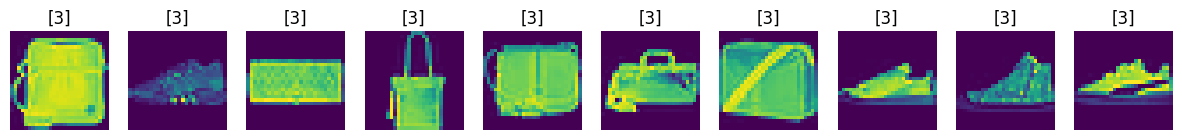

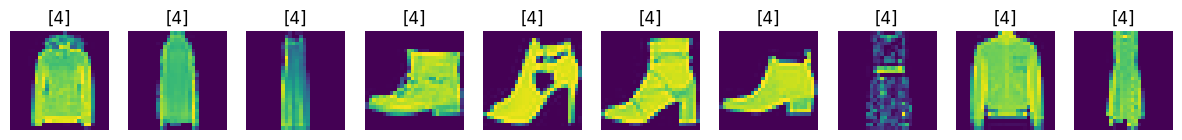

In [ ]:
for assigned_class in range(5):
  x_selected, y_selected = x_test_final[np.where(y_test == assigned_class)[0]], y_test.iloc[np.where(y_test == assigned_class)[0],:].values
  random_idx = np.random.choice(x_selected.shape[0],size=10, replace=False)
  x_random10, y_random10 = x_selected[random_idx], y_selected[random_idx]
  fig, axes = plt.subplots(1, 10, figsize=(15, 3), sharex=True, sharey=True)
  #print("K-means cluster number: {}".format(kmeans_cluster_label))
  for i, idx in enumerate(random_idx):
      axes[i].imshow(x_selected[idx])
      axes[i].set_axis_off()
      axes[i].set_title("{}".format(y_selected[idx]))